## Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
np.random.seed(seed=28)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import GridSearchCV, cross_val_score
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#getting data from git
#url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
#df = pd.read_csv(url, parse_dates=[5])
#df = df[(df['Date']>=datetime(2020, 1, 1)) & (df['Date']<datetime(2022, 1, 1))]
#df.to_csv('Data/data_2020_2021.csv', index = False)

df = pd.read_csv('Data/data_2020_2021.csv', parse_dates=[5])
print(df.shape)
print(df.columns)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\4218466403.py:7: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/data_2020_2021.csv', parse_dates=[5])


(244863, 61)
Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
     

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244863 entries, 0 to 244862
Data columns (total 61 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryName                                                                      244863 non-null  object        
 1   CountryCode                                                                      244863 non-null  object        
 2   RegionName                                                                       108166 non-null  object        
 3   RegionCode                                                                       108166 non-null  object        
 4   Jurisdiction                                                                     244863 non-null  object        
 5   Date                                                      

For further analysis only EU countries will be used

In [4]:
# Missing values
pd.DataFrame(df.isnull().sum()).sort_values(by = 0, ascending = False)

,0
M1_Wildcard,244863
V4_Mandatory Vaccination (summary),219002
V2B_Vaccine age eligibility/availability age floor (general population summary),174284
V2C_Vaccine age eligibility/availability age floor (at risk summary),173061
V2D_Medically/ clinically vulnerable (Non-elderly),164471
V2E_Education,164471
V2F_Frontline workers (non healthcare),164471
V2G_Frontline workers (healthcare),164471
C5_Flag,141029
RegionCode,136697


## Filter European countries

In [5]:
#Filter european countries
eu_countries = [
    'AUT',#
    'BEL',
    'BGR',
    'HRV',
    'CYP',
    'CZE',
    'DNK',
    'EST',
    'FIN',
    'FRA',
    'DEU',
    'GRC',
    'HUN',
    'IRL',
    'ITA',
    'LVA',
    'LTU',
    'LUX',
    'MLT',
    'NLD',
    'POL',
    'PRT',
    'ROU',
    'SVK',
    'SVN',
    'ESP',
    'SWE',
    'GBR'
]



df = df[df['CountryCode'].isin(eu_countries)]
df = df.reset_index(drop=True)

regnames = df['RegionName']
cnames = df['CountryName']
cnames_updated = []
for i in range(0, len(regnames)):
    if regnames[i] =='England':
        cnames_updated.append('England')
    elif regnames[i] =='Northern Ireland':
        cnames_updated.append('Northern Ireland')
    elif regnames[i] =='Scotland':
        cnames_updated.append('Scotland')
    elif regnames[i] =='Wales':
        cnames_updated.append('Wales')
    else:
        cnames_updated.append(cnames[i])
        
df['AreaName'] = cnames_updated

df.shape

(23392, 62)

In [6]:
#destribution within area name
df['AreaName'].value_counts()

Austria             731
Belgium             731
Slovenia            731
Slovak Republic     731
Romania             731
Portugal            731
Poland              731
Netherlands         731
Malta               731
Latvia              731
Luxembourg          731
Lithuania           731
Italy               731
Ireland             731
Hungary             731
Croatia             731
Greece              731
Wales               731
Scotland            731
Northern Ireland    731
England             731
United Kingdom      731
France              731
Finland             731
Estonia             731
Spain               731
Denmark             731
Germany             731
Czech Republic      731
Cyprus              731
Bulgaria            731
Sweden              731
Name: AreaName, dtype: int64

## Describe features

In [7]:
#Description of features
features = [
    'C1_School closing',# 'C1_Flag', 
    'C2_Workplace closing',# 'C2_Flag', 
    'C3_Cancel public events',# 'C3_Flag', 
    'C4_Restrictions on gatherings',# 'C4_Flag', 
    'C5_Close public transport', #'C5_Flag', 
    'C6_Stay at home requirements',# 'C6_Flag', 
    'C7_Restrictions on internal movement',# 'C7_Flag', 
    'C8_International travel controls', 
    'H1_Public information campaigns' #,'H1_Flag'
]
df[features].describe()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns
count,23392.000000,23392.000000,23392.000000,23392.000000,23352.000000,23392.000000,23392.000000,23392.000000,23392.000000
mean,1.523470,1.596315,1.417835,2.864569,0.456449,0.779839,0.636371,2.431259,1.861833
std,0.938061,0.892949,0.727566,1.453142,0.548832,0.835905,0.845385,1.047695,0.469926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,3.000000,2.000000
75%,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,2.000000
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000


In [8]:
#Missing values
pd.DataFrame(df[features].isnull().sum()).sort_index()

,0
C1_School closing,0
C2_Workplace closing,0
C3_Cancel public events,0
C4_Restrictions on gatherings,0
C5_Close public transport,40
C6_Stay at home requirements,0
C7_Restrictions on internal movement,0
C8_International travel controls,0
H1_Public information campaigns,0


In [9]:
#Mising values
df[df['C5_Close public transport'].isnull()].sort_values(['AreaName','Date'])

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,AreaName
9419,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-09,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7122135.0,120356.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9420,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-10,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7153622.0,120390.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9421,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-11,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7196718.0,120405.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9422,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-12,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7237587.0,120552.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9423,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-13,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7278124.0,120653.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9424,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-14,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7317379.0,120763.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9425,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-10-15,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7353995.0,120857.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9447,United Kingdom,GBR,England,UK_ENG,STATE_TOTAL,2021-11-06,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,0.0,2.0,0.0,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8105061.0,123491.0,23.15,23.15,32.14,32.14,34.11,34.11,35.42,35.42,25.0,25.0,England
9448,United Kingdom,GBR,Engla

In [10]:
#interpolation of missing values
for area in df['AreaName'].unique():
    df.update(df[df['AreaName'] == area]['C5_Close public transport'].interpolate(method ='linear', limit_direction ='forward'))

In [11]:
#check that there are no missing values
df[df['C5_Close public transport'].isnull()].sort_values(['AreaName','Date'])

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,AreaName


In [12]:
#Destribution of the parameter
df['C1_School closing'].value_counts(normalize = True).sort_index()

0.0    0.126753
1.0    0.411508
2.0    0.273256
3.0    0.188483
Name: C1_School closing, dtype: float64

In [13]:
#Destribution of the parameter
df['C2_Workplace closing'].value_counts(normalize = True).sort_index()

0.0    0.151719
1.0    0.226830
2.0    0.494870
3.0    0.126582
Name: C2_Workplace closing, dtype: float64

In [14]:
#Destribution of the parameter
df['C3_Cancel public events'].value_counts(normalize = True).sort_index()

0.0    0.143040
1.0    0.296084
2.0    0.560876
Name: C3_Cancel public events, dtype: float64

In [15]:
#Destribution of the parameter
df['C4_Restrictions on gatherings'].value_counts(normalize = True).sort_index()

0.0    0.146888
1.0    0.050060
2.0    0.101146
3.0    0.195409
4.0    0.506498
Name: C4_Restrictions on gatherings, dtype: float64

In [16]:
#Destribution of the parameter
df['C5_Close public transport'].value_counts(normalize = True).sort_index()

0.0    0.570451
1.0    0.403044
2.0    0.026505
Name: C5_Close public transport, dtype: float64

In [17]:
#Destribution of the parameter
df['C6_Stay at home requirements'].value_counts(normalize = True).sort_index()

0.0    0.482644
1.0    0.255899
2.0    0.260431
3.0    0.001026
Name: C6_Stay at home requirements, dtype: float64

In [18]:
#Destribution of the parameter
df['C7_Restrictions on internal movement'].value_counts(normalize = True).sort_index()

0.0    0.605250
1.0    0.153129
2.0    0.241621
Name: C7_Restrictions on internal movement, dtype: float64

In [19]:
#Destribution of the parameter
df['C8_International travel controls'].value_counts(normalize = True).sort_index()

0.0    0.107131
1.0    0.039885
2.0    0.232473
3.0    0.555617
4.0    0.064894
Name: C8_International travel controls, dtype: float64

In [20]:
#Destribution of the parameter
df['H1_Public information campaigns'].value_counts(normalize = True).sort_index()

0.0    0.050872
1.0    0.036423
2.0    0.912705
Name: H1_Public information campaigns, dtype: float64

## Target variable definition

In [21]:
#Example of raw target variables
df[df['AreaName']=='Austria'][['Date','ConfirmedCases', 'ConfirmedDeaths']].sort_values(by = 'Date').tail(10)

,Date,ConfirmedCases,ConfirmedDeaths
721,2021-12-22,1256230.0,13567.0
722,2021-12-23,1258377.0,13595.0
723,2021-12-24,1260751.0,13617.0
724,2021-12-25,1262836.0,13626.0
725,2021-12-26,1264553.0,13634.0
726,2021-12-27,1266103.0,13650.0
727,2021-12-28,1268519.0,13672.0
728,2021-12-29,1271770.0,13689.0
729,2021-12-30,1274995.0,13701.0
730,2021-12-31,1278619.0,13733.0


In [22]:
# Missing values
print(df[df['ConfirmedDeaths'].isnull()]['AreaName'].value_counts())
print('------------------------------')
print(df[df['ConfirmedCases'].isnull()]['AreaName'].value_counts())

Northern Ireland    78
Wales               76
Scotland            73
England             65
Austria             21
Hungary             21
Italy               21
Lithuania           21
Luxembourg          21
Latvia              21
Malta               21
Netherlands         21
Poland              21
Portugal            21
Romania             21
Slovak Republic     21
Slovenia            21
Ireland             21
Greece              21
Croatia             21
Belgium             21
United Kingdom      21
France              21
Finland             21
Estonia             21
Spain               21
Denmark             21
Germany             21
Czech Republic      21
Cyprus              21
Bulgaria            21
Sweden              21
Name: AreaName, dtype: int64
------------------------------
Scotland            58
Wales               57
Northern Ireland    56
England             29
Austria             21
Hungary             21
Italy               21
Lithuania           21
Luxembourg          

In [23]:
#Interpolation and mortality rate calculation
df[['ConfirmedCases', 'ConfirmedDeaths']] = df[['ConfirmedCases', 'ConfirmedDeaths']].fillna(0)
df['DeathsToCases'] = df['ConfirmedDeaths']/df['ConfirmedCases']*100
df['DeathsToCases'] = df['DeathsToCases'].fillna(0)
df[['DeathsToCases','ConfirmedDeaths', 'ConfirmedCases']].tail()

,DeathsToCases,ConfirmedDeaths,ConfirmedCases
23387,1.198841,15265.0,1273313.0
23388,1.180787,15286.0,1294560.0
23389,1.173386,15297.0,1303663.0
23390,1.164450,15310.0,1314784.0
23391,1.164450,15310.0,1314784.0


In [24]:
#Key statistics
df[['DeathsToCases', 'ConfirmedDeaths', 'ConfirmedCases']].describe()

,DeathsToCases,ConfirmedDeaths,ConfirmedCases
count,23392.000000,23392.000000,2.339200e+04
mean,2.950306,17705.456566,7.728259e+05
std,3.263386,31701.968932,1.532216e+06
min,0.000000,0.000000,0.000000e+00
25%,1.214939,319.000000,1.125075e+04
50%,1.921606,3114.000000,1.541290e+05
75%,3.247971,17674.250000,7.186218e+05
max,24.250509,148624.000000,1.293789e+07


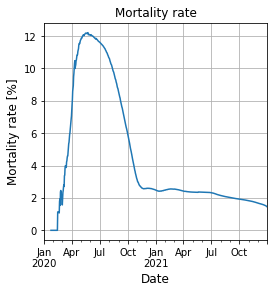

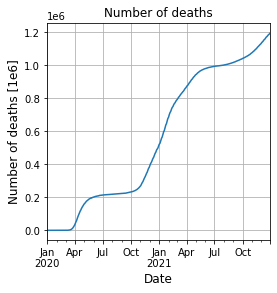

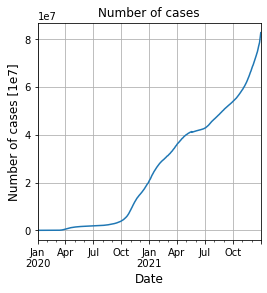

In [25]:
#Visualisation of variables
sum_daily_deaths = df['ConfirmedDeaths'].groupby(df.Date).agg(['sum'])
sum_daily_cases = df['ConfirmedCases'].groupby(df.Date).agg(['sum'])
deaths_to_cases_daily        = sum_daily_deaths/sum_daily_cases*100
agg_daily = sum_daily_deaths.rename(columns={'sum': 'Number of deaths'})
agg_daily['Number of cases'] = sum_daily_cases['sum']
agg_daily['Mortality rate'] = deaths_to_cases_daily
plt.rcParams["figure.figsize"] = (4,4)
matplotlib.rcParams.update({'font.size': 10})

agg_daily.plot(y='Mortality rate', use_index=True, kind="line", title="Mortality rate", legend=None)
plt.ylabel('Mortality rate [%]',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.grid()
#plt.savefig('mortality rate.png')

agg_daily.plot(y='Number of deaths', use_index=True, kind="line", title="Number of deaths", legend=None)
plt.ylabel('Number of deaths [1e6]',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.grid()
#plt.savefig('deaths.png')
agg_daily.plot(y='Number of cases', use_index=True, kind="line", title="Number of cases", legend=None)
plt.ylabel('Number of cases [1e7]',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.grid()
#plt.savefig('cases.png')

In [26]:
#Maximum values
agg_daily.max()

Number of deaths    1.198873e+06
Number of cases     8.275390e+07
Mortality rate      1.221184e+01
dtype: float64

In [27]:
#Basic statistics
agg_daily.describe()

,Number of deaths,Number of cases,Mortality rate
count,7.310000e+02,7.310000e+02,708.000000
mean,5.665746e+05,2.473043e+07,4.468448
std,4.102332e+05,2.326171e+07,3.733899
min,0.000000e+00,0.000000e+00,0.000000
25%,2.142440e+05,1.844250e+06,2.104976
50%,5.164010e+05,2.071739e+07,2.477273
75%,9.948730e+05,4.282778e+07,6.666656
max,1.198873e+06,8.275390e+07,12.211839


In [28]:
#Correlation
r = np.corrcoef(df['ConfirmedCases'].values, df['ConfirmedDeaths'].values)
r

array([[1.        , 0.93441436],
       [0.93441436, 1.        ]])

## Absolute Daily Increase

In [29]:
#Fix data
df['ConfirmedCasesDailyIncrease'] = df.groupby('AreaName')['ConfirmedCases'].diff()
df['ConfirmedCasesDailyIncrease'] = df['ConfirmedCasesDailyIncrease'].fillna(0)
df['ConfirmedDeathsDailyIncrease'] = df.groupby('AreaName')['ConfirmedDeaths'].diff()
df['ConfirmedDeathsDailyIncrease'] = df['ConfirmedDeathsDailyIncrease'].fillna(0)
print(df[df['ConfirmedCasesDailyIncrease']<0].shape)
print(df[df['ConfirmedDeathsDailyIncrease']<0].shape)
df.loc[df['ConfirmedCasesDailyIncrease']<0,  'ConfirmedCasesDailyIncrease'] = 0
df.loc[df['ConfirmedDeathsDailyIncrease']<0, 'ConfirmedDeathsDailyIncrease'] = 0

(29, 65)
(58, 65)


In [30]:
#Example of changes
print(df[(df['ConfirmedCasesDailyIncrease']==0)  & (df['ConfirmedCases']!=0)].shape)
print(df[(df['ConfirmedDeathsDailyIncrease']==0)  & (df['ConfirmedDeaths']!=0)].shape)
df[['ConfirmedCases', 'ConfirmedCasesDailyIncrease']].tail(10)

(1254, 65)
(4665, 65)


,ConfirmedCases,ConfirmedCasesDailyIncrease
23382,1268254.0,4688.0
23383,1273313.0,5059.0
23384,1273313.0,0.0
23385,1273313.0,0.0
23386,1273313.0,0.0
23387,1273313.0,0.0
23388,1294560.0,21247.0
23389,1303663.0,9103.0
23390,1314784.0,11121.0
23391,1314784.0,0.0


In [31]:
# Processing of cases when absolute increase if equal to 0 (weekends, holidays)
df['ConfirmedCasesDailyIncrease_Old']=df['ConfirmedCasesDailyIncrease']
df['ConfirmedCasesDailyIncrease']=np.nan

for area in df['AreaName'].unique():
    df_area = df[df['AreaName']==area] 

    cases = df_area['ConfirmedCasesDailyIncrease_Old'].to_list()
    cases_cumsum = df_area['ConfirmedCases'].to_list()
    not0flag = (df_area['ConfirmedCasesDailyIncrease_Old']!=0).astype('int64').to_list()
    for i in range(len(cases)):
        if cases[i] == 0:
            if cases_cumsum[i] != 0:
                if (1 in not0flag[i:]):
                    firstnot0_index = not0flag[i:].index(1)+i
                    firstnot0_value = cases[firstnot0_index]
                    days_number = firstnot0_index-i +1
                    integer_part = firstnot0_value//days_number
                    remainder = firstnot0_value%days_number
                    for j in range(i,firstnot0_index):
                        cases[j]=integer_part
                    cases[firstnot0_index] = integer_part+remainder   
    df_area['ConfirmedCasesDailyIncrease']=cases
    df['ConfirmedCasesDailyIncrease'] = df['ConfirmedCasesDailyIncrease'].combine_first(df_area['ConfirmedCasesDailyIncrease'])
#ind = (df_austria['ConfirmedCasesDailyIncrease']!=0).astype('int64')
#ind.to_excel('ind.xlsx')




df['ConfirmedDeathsDailyIncrease_Old']=df['ConfirmedDeathsDailyIncrease']
df['ConfirmedDeathsDailyIncrease']=np.nan

for area in df['AreaName'].unique():
    df_area = df[df['AreaName']==area] 

    deaths = df_area['ConfirmedDeathsDailyIncrease_Old'].to_list()
    deaths_cumsum = df_area['ConfirmedDeaths'].to_list()
    not0flag = (df_area['ConfirmedDeathsDailyIncrease_Old']!=0).astype('int64').to_list()
    for i in range(len(deaths)):
        if deaths[i] == 0:
            if deaths_cumsum[i] != 0:
                if (1 in not0flag[i:]):
                    firstnot0_index = not0flag[i:].index(1)+i
                    firstnot0_value = deaths[firstnot0_index]
                    days_number = firstnot0_index-i +1
                    integer_part = firstnot0_value//days_number
                    remainder = firstnot0_value%days_number
                    for j in range(i,firstnot0_index):
                        deaths[j]=integer_part
                    deaths[firstnot0_index] = integer_part+remainder
    
    df_area['ConfirmedDeathsDailyIncrease']=deaths
    df['ConfirmedDeathsDailyIncrease'] = df['ConfirmedDeathsDailyIncrease'].combine_first(df_area['ConfirmedDeathsDailyIncrease'])

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\4146076013.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['ConfirmedCasesDailyIncrease']=cases
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\4146076013.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['ConfirmedDeathsDailyIncrease']=deaths


In [32]:
#Results of transformatin
df[(df['CountryName']=='Sweden') & (df['Date']> '2020-12-10')][['Date', 'ConfirmedCases','ConfirmedCasesDailyIncrease_Old', 'ConfirmedCasesDailyIncrease']].head(20)

,Date,ConfirmedCases,ConfirmedCasesDailyIncrease_Old,ConfirmedCasesDailyIncrease
23006,2020-12-11,320098.0,7370.0,7370.0
23007,2020-12-12,320098.0,0.0,5232.0
23008,2020-12-13,320098.0,0.0,5232.0
23009,2020-12-14,320098.0,0.0,5232.0
23010,2020-12-15,341029.0,20931.0,5235.0
23011,2020-12-16,348585.0,7556.0,7556.0
23012,2020-12-17,357466.0,8881.0,8881.0
23013,2020-12-18,367120.0,9654.0,9654.0
23014,2020-12-19,367120.0,0.0,5579.0
23015,2020-12-20,367120.0,0.0,5579.0


In [33]:
#Basic statistics
df[['ConfirmedCasesDailyIncrease', 'ConfirmedDeathsDailyIncrease']].describe().round(2)

,ConfirmedCasesDailyIncrease,ConfirmedDeathsDailyIncrease
count,23392.00,23392.00
mean,3560.31,51.37
std,9568.53,131.75
min,0.00,0.00
25%,71.00,1.00
50%,548.00,6.00
75%,2621.00,37.00
max,232200.00,1820.00


## Daily inclease to last week avg

In [34]:
# Calculation of ConfirmedCasesPctChange and ConfirmedDeathsPctChange
for i in range(1,8):
    df['ConfirmedCasesDailyShift' + str(i)] = df.groupby('AreaName')['ConfirmedCasesDailyIncrease'].shift(i)
    df['ConfirmedDeathsDailyShift' + str(i)] = df.groupby('AreaName')['ConfirmedDeathsDailyIncrease'].shift(i)
    
    
    
    
def avg7_cases(obs):
    sum_res = 0
    for i in range(1,8):
        if str(obs['ConfirmedCasesDailyShift' + str(i)]) != 'nan':
            sum_res = sum_res + obs['ConfirmedCasesDailyShift' + str(i)] 
    return sum_res / 7

df['Last7DaysAvgCases'] = df.apply(avg7_cases, axis=1)

def avg7_deaths(obs):
    sum_res = 0
    for i in range(1,8):
        if str(obs['ConfirmedDeathsDailyShift' + str(i)]) != 'nan':
            sum_res = sum_res + obs['ConfirmedDeathsDailyShift' + str(i)]  
    return sum_res / 7
    
df['Last7DaysAvgDeaths'] = df.apply(avg7_deaths, axis=1)

def pct_change_cases(obs):
    if obs["ConfirmedCasesDailyIncrease"] == 0:
        return 0
    if obs["Last7DaysAvgCases"] == 0:
        return 1
    return obs["ConfirmedCasesDailyIncrease"]/(obs["Last7DaysAvgCases"]) - 1

df['ConfirmedCasesPctChange'] = df.apply(pct_change_cases, axis=1)

def pct_change_deaths(obs):
    if obs["ConfirmedDeathsDailyIncrease"] == 0:
        return 0
    if obs["Last7DaysAvgDeaths"] == 0:
        return 1
    return obs["ConfirmedDeathsDailyIncrease"]/(obs["Last7DaysAvgDeaths"]) - 1

df['ConfirmedDeathsPctChange'] = df.apply(pct_change_deaths, axis=1)


print(df.shape)
df = df.dropna(subset=['ConfirmedCasesDailyShift7', 'ConfirmedDeathsDailyShift7']) # Drop all which do not have a value fo the largest shift
print(df.shape)
df

(23392, 85)
(23168, 85)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,AreaName,DeathsToCases,ConfirmedCasesDailyIncrease,ConfirmedDeathsDailyIncrease,ConfirmedCasesDailyIncrease_Old,ConfirmedDeathsDailyIncrease_Old,ConfirmedCasesDailyShift1,ConfirmedDeathsDailyShift1,ConfirmedCasesDailyShift2,ConfirmedDeathsDailyShift2,ConfirmedCasesDailyShift3,ConfirmedDeathsDailyShift3,ConfirmedCasesDailyShift4,ConfirmedDeathsDailyShift4,ConfirmedCasesDailyShift5,ConfirmedDeathsDailyShift5,ConfirmedCasesDailyShift6,ConfirmedDeathsDailyShift6,ConfirmedCasesDailyShift7,ConfirmedDeathsDailyShift7,Last7DaysAvgCases,Last7DaysAvgDeaths,ConfirmedCasesPctChange,ConfirmedDeathsPctChange
7,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-08,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-09,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-10,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-11,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
11,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-12,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,..

In [35]:
#Basic statistics
df[['ConfirmedCasesPctChange','ConfirmedDeathsPctChange']].describe().round(2)

,ConfirmedCasesPctChange,ConfirmedDeathsPctChange
count,23168.00,23168.00
mean,0.13,0.19
std,0.99,1.11
min,-0.99,-0.99
25%,-0.18,-0.19
50%,0.00,0.00
75%,0.26,0.27
max,65.50,75.22


## Detect ouliers in target variables

In [36]:
#Rename columns
df.rename(columns = {'ConfirmedCasesPctChange': 'Daily percentage change of cases' }, inplace = True)
df.rename(columns = {'ConfirmedDeathsPctChange': 'Daily percentage change of deaths' }, inplace = True)

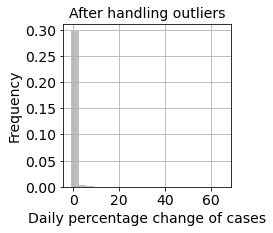

In [37]:
#Plot destribution
plt.rcParams["figure.figsize"] = (3,3)
matplotlib.rcParams.update({'font.size': 10})
df['Daily percentage change of cases'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey', fontsize=14)
plt.title('After handling outliers', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Daily percentage change of cases',fontsize=14)
plt.grid()

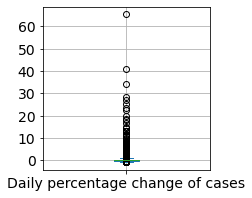

In [38]:
#Plot destribution
_, bp = df['Daily percentage change of cases'].plot.box(return_type='both',fontsize=14)
plt.grid()

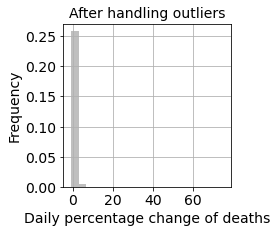

In [39]:
#Plot destribution
plt.rcParams["figure.figsize"] = (3,3)
matplotlib.rcParams.update({'font.size': 10})
df['Daily percentage change of deaths'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey', fontsize=14)
plt.title('After handling outliers', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Daily percentage change of deaths',fontsize=14)
plt.grid()

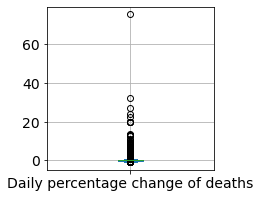

In [40]:
#Plot destribution
_, bp = df['Daily percentage change of deaths'].plot.box(return_type='both',fontsize=14)
plt.grid()

In [41]:
#IQR change
q_25 = np.percentile(df.loc[:,'Daily percentage change of cases'],[25])
q_75 = np.percentile(df.loc[:,'Daily percentage change of cases'],[75])
interquartile_range = q_75-q_25
min_point = q_25-(1.5*interquartile_range)
min_point = min_point[0]
max_point = q_75+(1.5*interquartile_range)
max_point = max_point[0]
print(df.loc[df['Daily percentage change of cases'] < min_point].shape)
print(df.loc[df['Daily percentage change of cases'] > max_point].shape)
df.loc[df['Daily percentage change of cases'] < min_point, 'Daily percentage change of cases'] = min_point
df.loc[df['Daily percentage change of cases'] > max_point, 'Daily percentage change of cases'] = max_point

(108, 85)
(1128, 85)


In [42]:
#IQR change
q_25 = np.percentile(df.loc[:,'Daily percentage change of deaths'],[25])
q_75 = np.percentile(df.loc[:,'Daily percentage change of deaths'],[75])
interquartile_range = q_75-q_25
min_point = q_25-(1.5*interquartile_range)
min_point = min_point[0]
max_point = q_75+(1.5*interquartile_range)
max_point = max_point[0]
print(df.loc[df['Daily percentage change of deaths'] < min_point].shape)
print(df.loc[df['Daily percentage change of deaths'] > max_point].shape)
df.loc[df['Daily percentage change of deaths'] < min_point, 'Daily percentage change of deaths'] = min_point
df.loc[df['Daily percentage change of deaths'] > max_point, 'Daily percentage change of deaths'] = max_point

(135, 85)
(2117, 85)


In [43]:
#Rename columns
df.rename(columns = {'Daily percentage change of cases': 'ConfirmedCasesPctChange' }, inplace = True)
df.rename(columns = {'Daily percentage change of deaths': 'ConfirmedDeathsPctChange' }, inplace = True)

## Week to week increase

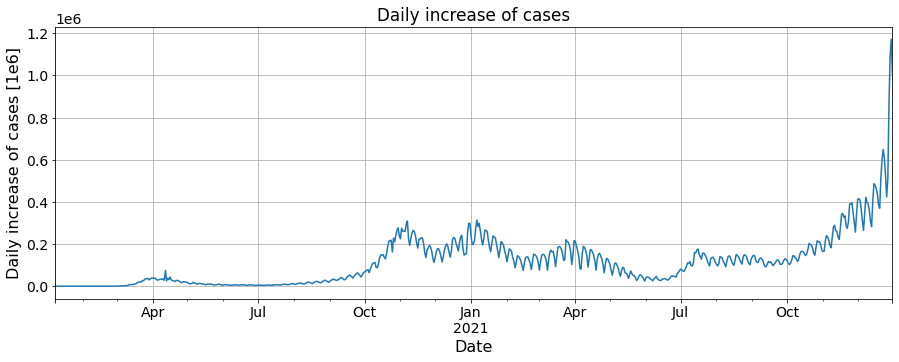

In [44]:
#weekly seasonality
plt.rcParams["figure.figsize"] = (15,5)
matplotlib.rcParams.update({'font.size': 14})
df['ConfirmedCasesDailyIncrease'].groupby(df.Date).agg(['sum']).plot(legend = None, title="Daily increase of cases") 
#df.plot(y='ConfirmedCasesDailyIncrease', use_index=False, kind="line", title="Daily increase of cases", legend=None)
plt.ylabel('Daily increase of cases [1e6]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.grid()

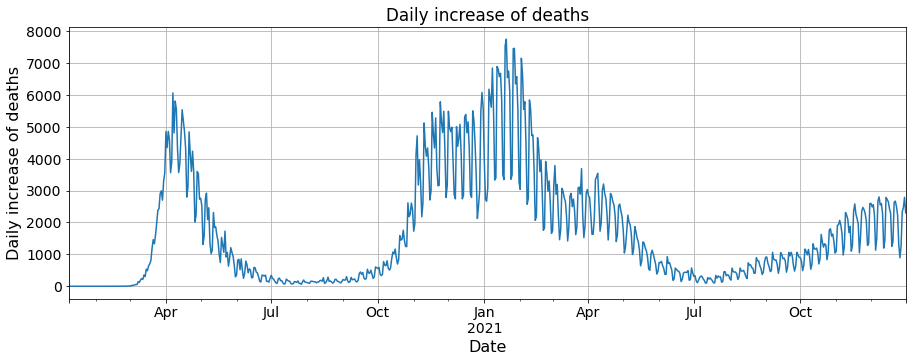

In [45]:
#weekly seasonality
plt.rcParams["figure.figsize"] = (15,5)
matplotlib.rcParams.update({'font.size': 14})
df['ConfirmedDeathsDailyIncrease'].groupby(df.Date).agg(['sum']).plot(legend = None, title="Daily increase of deaths") 
#df.plot(y='ConfirmedCasesDailyIncrease', use_index=False, kind="line", title="Daily increase of cases", legend=None)
plt.ylabel('Daily increase of deaths',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.grid()

In [46]:
#weekly seasonality
df['Weekday'] = df['Date'].apply(lambda x: x.weekday())
print(df['ConfirmedCasesDailyIncrease'].groupby(df.Weekday).agg(['mean']))
df['ConfirmedDeathsDailyIncrease'].groupby(df.Weekday).agg(['mean'])

                mean
Weekday             
0        2741.897148
1        3494.151396
2        4139.646034
3        4241.204026
4        4059.100060
5        3457.622876
6        3013.410801


,mean
Weekday,
0,35.934466
1,64.800061
2,63.515325
3,57.939002
4,59.685096
5,48.488471
6,32.490898


In [48]:
#Calculation of ConfirmedCasesPctChangeWeekly and ConfirmedDeathsPctChangeWeekly
for i in range(1,8):
    df['ConfirmedCasesDailyShift' + str(i)] = df.groupby('AreaName')['ConfirmedCasesDailyIncrease'].shift(i)
    df['ConfirmedDeathsDailyShift' + str(i)] = df.groupby('AreaName')['ConfirmedDeathsDailyIncrease'].shift(i)
    
    
def sum7_cases(obs):
    sum_res = 0
    for i in range(1,8):
        if str(obs['ConfirmedCasesDailyShift'+str(i)]) != 'nan':
            sum_res = sum_res + obs['ConfirmedCasesDailyShift'+str(i)] 
    return sum_res

df['Last7DaysSumCases'] = df.apply(sum7_cases, axis=1)

def sum7_deaths(obs):
    sum_res = 0
    for i in range(1,8):
        if str(obs['ConfirmedDeathsDailyShift'+str(i)]) != 'nan':
            sum_res = sum_res + obs['ConfirmedDeathsDailyShift'+str(i)]  
    return sum_res

df['Last7DaysSumDeaths'] = df.apply(sum7_deaths, axis=1)   



#############

for i in range(1,7):
    df['ConfirmedCasesDailyShift' + 'next' + str(i)] = df.groupby('AreaName')['ConfirmedCasesDailyIncrease'].shift(-i)
    df['ConfirmedDeathsDailyShift' + 'next' + str(i)] = df.groupby('AreaName')['ConfirmedDeathsDailyIncrease'].shift(-i)
    
    
def sum7_cases_next(obs):
    sum_res = obs['ConfirmedCasesDailyIncrease']
    if str(obs['ConfirmedCasesDailyIncrease']) != 'nan':
        for i in range(1,7):
            if str(obs['ConfirmedCasesDailyShift' + 'next' + str(i)]) != 'nan':
                sum_res = sum_res + obs['ConfirmedCasesDailyShift' + 'next' + str(i)] 
    return sum_res

def sum7_deaths_next(obs):
    sum_res = obs['ConfirmedDeathsDailyIncrease']
    if str(obs['ConfirmedDeathsDailyIncrease']) != 'nan':
        for i in range(1,7):
            if str(obs['ConfirmedDeathsDailyShift' + 'next' + str(i)]) != 'nan':
                sum_res = sum_res + obs['ConfirmedDeathsDailyShift' + 'next' + str(i)]  
    return sum_res
    
df['Next7DaysSumCases'] = df.apply(sum7_cases_next, axis=1)
df['Next7DaysSumDeaths'] = df.apply(sum7_deaths_next, axis=1)

###############

def ratio_cases(obs):
    if obs["Next7DaysSumCases"] == 0:
        return 0
    if obs["Last7DaysSumCases"] == 0:
        return 1
    return obs["Next7DaysSumCases"]/(obs["Last7DaysSumCases"]) - 1

df['ConfirmedCasesPctChangeWeekly'] = df.apply(ratio_cases, axis=1)

def ratio_deaths(obs):
    if obs["Next7DaysSumDeaths"] == 0:
        return 0
    if obs["Last7DaysSumDeaths"] == 0:
        return 1
    return obs["Next7DaysSumDeaths"]/(obs["Last7DaysSumDeaths"]) - 1


df['ConfirmedDeathsPctChangeWeekly'] = df.apply(ratio_deaths, axis=1)


print(df.shape)
df = df.dropna(subset=['ConfirmedCasesDailyShiftnext6', 'ConfirmedDeathsDailyShiftnext6']) # Drop all which do not have a value fo the largest shift
print(df.shape)
df

(23168, 104)
(22976, 104)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,V1_Vaccine Prioritisation (summary),V2A_Vaccine Availability (summary),V2B_Vaccine age eligibility/availability age floor (general population summary),V2C_Vaccine age eligibility/availability age floor (at risk summary),V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,...,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,AreaName,DeathsToCases,ConfirmedCasesDailyIncrease,ConfirmedDeathsDailyIncrease,ConfirmedCasesDailyIncrease_Old,ConfirmedDeathsDailyIncrease_Old,ConfirmedCasesDailyShift1,ConfirmedDeathsDailyShift1,ConfirmedCasesDailyShift2,ConfirmedDeathsDailyShift2,ConfirmedCasesDailyShift3,ConfirmedDeathsDailyShift3,ConfirmedCasesDailyShift4,ConfirmedDeathsDailyShift4,ConfirmedCasesDailyShift5,ConfirmedDeathsDailyShift5,ConfirmedCasesDailyShift6,ConfirmedDeathsDailyShift6,ConfirmedCasesDailyShift7,ConfirmedDeathsDailyShift7,Last7DaysAvgCases,Last7DaysAvgDeaths,ConfirmedCasesPctChange,ConfirmedDeathsPctChange,Weekday,Last7DaysSumCases,Last7DaysSumDeaths,ConfirmedCasesDailyShiftnext1,ConfirmedDeathsDailyShiftnext1,ConfirmedCasesDailyShiftnext2,ConfirmedDeathsDailyShiftnext2,ConfirmedCasesDailyShiftnext3,ConfirmedDeathsDailyShiftnext3,ConfirmedCasesDailyShiftnext4,ConfirmedDeathsDailyShiftnext4,ConfirmedCasesDailyShiftnext5,ConfirmedDeathsDailyShiftnext5,ConfirmedCasesDailyShiftnext6,ConfirmedDeathsDailyShiftnext6,Next7DaysSumCases,Next7DaysSumDeaths,ConfirmedCasesPctChangeWeekly,ConfirmedDeathsPctChangeWeekly
7,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-08,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-09,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
9,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-10,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Austria,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
10,Austria,AUT,NaN,NaN,NAT_TOTAL,2020-01-11,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,

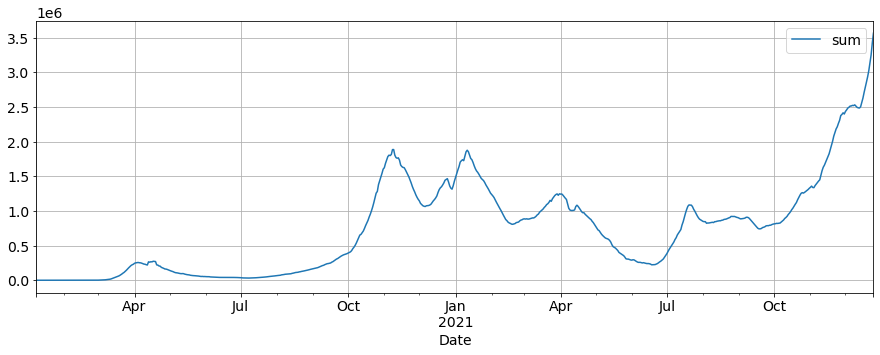

In [49]:
#After transformation without weekly pattern
plt.rcParams["figure.figsize"] = (15,5)
df['Last7DaysSumCases'].groupby(df.Date).agg(['sum']).plot() 
plt.grid()

In [50]:
#Key statistics
df[['ConfirmedCasesPctChangeWeekly','ConfirmedDeathsPctChangeWeekly']].describe()

,ConfirmedCasesPctChangeWeekly,ConfirmedDeathsPctChangeWeekly
count,22976.000000,22976.000000
mean,0.373009,0.261888
std,3.001844,1.421635
min,-0.904762,-0.992045
25%,-0.142535,-0.166667
50%,0.026077,0.000000
75%,0.306934,0.301873
max,197.000000,75.222222


## Remove outlier for week to week variable

In [51]:
#Rename columns
df.rename(columns = {'ConfirmedCasesPctChangeWeekly': 'Weekly percentage change of cases' }, inplace = True)
df.rename(columns = {'ConfirmedDeathsPctChangeWeekly': 'Weekly percentage change of deaths' }, inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2641150867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'ConfirmedCasesPctChangeWeekly': 'Weekly percentage change of cases' }, inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2641150867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'ConfirmedDeathsPctChangeWeekly': 'Weekly percentage change of deaths' }, inplace = True)


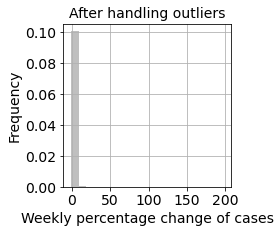

In [52]:
#Plot destribution
plt.rcParams["figure.figsize"] = (3,3)
matplotlib.rcParams.update({'font.size': 10})
df['Weekly percentage change of cases'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey', fontsize=14)
plt.title('After handling outliers', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Weekly percentage change of cases',fontsize=14)
plt.grid()

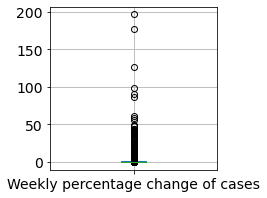

In [53]:
#Plot destribution
_, bp = df['Weekly percentage change of cases'].plot.box(return_type='both',fontsize=14)
plt.grid()

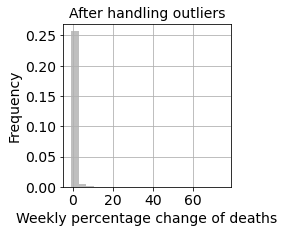

In [54]:
#Plot destribution
plt.rcParams["figure.figsize"] = (3,3)
matplotlib.rcParams.update({'font.size': 10})
df['Weekly percentage change of deaths'].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey', fontsize=14)
plt.title('After handling outliers', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Weekly percentage change of deaths',fontsize=14)
plt.grid()

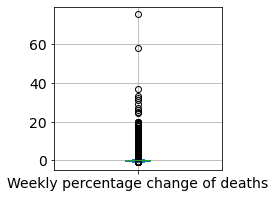

In [55]:
#Plot destribution
_, bp = df['Weekly percentage change of deaths'].plot.box(return_type='both',fontsize=14)
plt.grid()

In [56]:
#IQR transformation
q_25 = np.percentile(df.loc[:,'Weekly percentage change of cases'],[25])
q_75 = np.percentile(df.loc[:,'Weekly percentage change of cases'],[75])
interquartile_range = q_75-q_25
min_point = q_25-(1.5*interquartile_range)
min_point = min_point[0]
max_point = q_75+(1.5*interquartile_range)
max_point = max_point[0]
print(df.loc[df['Weekly percentage change of cases'] < min_point].shape)
print(df.loc[df['Weekly percentage change of cases'] > max_point].shape)
df.loc[df['Weekly percentage change of cases'] < min_point, 'Weekly percentage change of cases'] = min_point
df.loc[df['Weekly percentage change of cases'] > max_point, 'Weekly percentage change of cases'] = max_point

(24, 104)
(1689, 104)


In [57]:
#IQR transformation
q_25 = np.percentile(df.loc[:,'Weekly percentage change of deaths'],[25])
q_75 = np.percentile(df.loc[:,'Weekly percentage change of deaths'],[75])
interquartile_range = q_75-q_25
min_point = q_25-(1.5*interquartile_range)
min_point = min_point[0]
max_point = q_75+(1.5*interquartile_range)
max_point = max_point[0]
print(df.loc[df['Weekly percentage change of deaths'] < min_point].shape)
print(df.loc[df['Weekly percentage change of deaths'] > max_point].shape)
df.loc[df['Weekly percentage change of deaths'] < min_point, 'Weekly percentage change of deaths'] = min_point
df.loc[df['Weekly percentage change of deaths'] > max_point, 'Weekly percentage change of deaths'] = max_point

(35, 104)
(1438, 104)


In [58]:
#Rename columns
df.rename(columns = {'Weekly percentage change of cases': 'ConfirmedCasesPctChangeWeekly' }, inplace = True)
df.rename(columns = {'Weekly percentage change of deaths': 'ConfirmedDeathsPctChangeWeekly' }, inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2366082871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Weekly percentage change of cases': 'ConfirmedCasesPctChangeWeekly' }, inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2366082871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Weekly percentage change of deaths': 'ConfirmedDeathsPctChangeWeekly' }, inplace = True)


## Time shift for target variables

In [59]:
#Function for values shift
def shift_values(df, shift_in_days, old_column):
    df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
    return df

In [60]:
#Shift values
for i in range(0,61):
    df = shift_values(df, -i, 'ConfirmedCasesPctChange')

for i in range(0,61):
    df = shift_values(df, -i, 'ConfirmedDeathsPctChange')
    
for i in range(0,61):
    df = shift_values(df, -i, 'ConfirmedCasesPctChangeWeekly')

for i in range(0,61):
    df = shift_values(df, -i, 'ConfirmedDeathsPctChangeWeekly')

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to 

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to 

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to 

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to 

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragme

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[old_column + str(-shift_in_days)] = df.groupby('AreaName')[old_column].shift(shift_in_days)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\975092797.py:3: SettingWithCopyWarning: 
A value is trying to 

In [61]:
#Drop empty rows
for i in range(0,61):
    df_timeshift = df.dropna(subset = ['ConfirmedCasesPctChange' + str(i)])
for i in range(0,61):
    df_timeshift = df.dropna(subset = ['ConfirmedDeathsPctChange' + str(i)])
for i in range(0,61):
    df_timeshift = df.dropna(subset = ['ConfirmedCasesPctChangeWeekly' + str(i)])
for i in range(0,61):
    df_timeshift = df.dropna(subset = ['ConfirmedDeathsPctChangeWeekly' + str(i)])
    

In [62]:
#Train Linear regression models
features = [
    'C1_School closing',# 'C1_Flag', 
    'C2_Workplace closing',# 'C2_Flag', 
    'C3_Cancel public events',# 'C3_Flag', 
    'C4_Restrictions on gatherings',# 'C4_Flag', 
    'C5_Close public transport', #'C5_Flag', 
    'C6_Stay at home requirements',# 'C6_Flag', 
    'C7_Restrictions on internal movement',# 'C7_Flag', 
    'C8_International travel controls', 
    'H1_Public information campaigns'#, #,'H1_Flag',
    #'population_percentage'
    #'StringencyIndex'
]

r2_cases = []
r2_deaths = []
r2_casesw = []
r2_deathsw = []
#cases_popt = {}
#deaths_popt = {}

X = pd.DataFrame(df_timeshift[features])
for i in range(0,61):
    y = df_timeshift['ConfirmedCasesPctChange' + str(i)]
    lr_classifier = LinearRegression()
    lr_classifier.fit(X,y)
    r2_cases.append(lr_classifier.score(X, y))#R2
    #cases_popt[i] = lr_classifier.coef_
    
    
X = df_timeshift[features]
for i in range(0,61):
    y = df_timeshift['ConfirmedDeathsPctChange' + str(i)]
    lr_classifier = LinearRegression()
    lr_classifier.fit(X,y)
    r2_deaths.append(lr_classifier.score(X, y))#R2
    #deaths_popt[i] = lr_classifier.coef_

X = pd.DataFrame(df_timeshift[features])
for i in range(0,61):
    y = df_timeshift['ConfirmedCasesPctChangeWeekly' + str(i)]
    lr_classifier = LinearRegression()
    lr_classifier.fit(X,y)
    r2_casesw.append(lr_classifier.score(X, y))#R2
    #cases_popt[i] = lr_classifier.coef_
    
    
X = df_timeshift[features]
for i in range(0,61):
    y = df_timeshift['ConfirmedDeathsPctChangeWeekly' + str(i)]
    lr_classifier = LinearRegression()
    lr_classifier.fit(X,y)
    r2_deathsw.append(lr_classifier.score(X, y))#R2
    #deaths_popt[i] = lr_classifier.coef_


0.07079423651259997
18


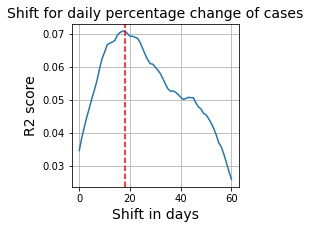

In [63]:
#Plot R2
import matplotlib.pyplot as plt
max_value = np.array(r2_cases).max()
print(max_value)
print(r2_cases.index(max_value))
plt.plot(r2_cases)
plt.title('Shift for daily percentage change of cases',  fontsize = 14)
plt.axvline(x=18, color = 'r', linestyle = '--')#17
plt.ylabel('R2 score', fontsize = 14)
plt.xlabel('Shift in days', fontsize = 14)
plt.grid()
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

0.19056194495243473
16


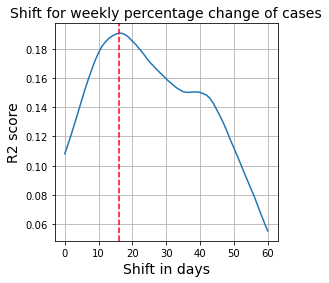

In [64]:
#Plot R2
max_value = np.array(r2_casesw).max()
print(max_value)
print(r2_casesw.index(max_value))
plt.plot(r2_casesw)
plt.title('Shift for weekly percentage change of cases',  fontsize = 14)
plt.axvline(x=16, color = 'r', linestyle = '--')#17
plt.ylabel('R2 score', fontsize = 14)
plt.xlabel('Shift in days', fontsize = 14)
plt.grid()
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

0.03547896726257349
29


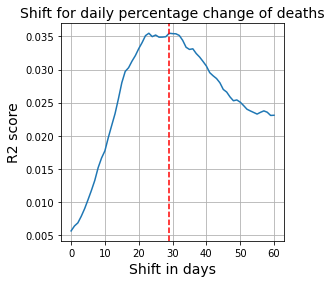

In [65]:
#Plot R2
max_value = np.array(r2_deaths).max()
print(max_value)
print(r2_deaths.index(max_value))
plt.plot(r2_deaths)
plt.title('Shift for daily percentage change of deaths',  fontsize = 14)
plt.axvline(x=29, color = 'r', linestyle = '--')#17
plt.ylabel('R2 score', fontsize = 14)
plt.xlabel('Shift in days', fontsize = 14)
plt.grid()
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

0.1318203739742817
30


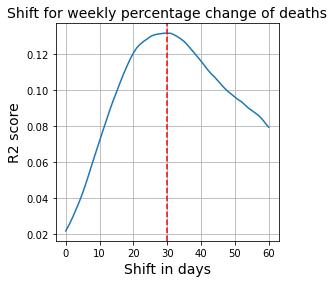

In [66]:
#Plot R2
max_value = np.array(r2_deathsw).max()
print(max_value)
print(r2_deathsw.index(max_value))
plt.plot(r2_deathsw)
plt.title('Shift for weekly percentage change of deaths',  fontsize = 14)
plt.axvline(x=30, color = 'r', linestyle = '--')#17
plt.ylabel('R2 score', fontsize = 14)
plt.xlabel('Shift in days', fontsize = 14)
plt.grid()
plt.rcParams["figure.figsize"] = (4,4)
plt.show()

In [67]:
# Shift the columns
df['ConfirmedCasesPctChangeWeekly16'] = df.groupby('AreaName')['ConfirmedCasesPctChangeWeekly'].shift(-16)
df['ConfirmedDeathsPctChangeWeekly30'] = df.groupby('AreaName')['ConfirmedDeathsPctChangeWeekly'].shift(-30)
df = df.dropna(subset=['ConfirmedCasesPctChangeWeekly16'])
df = df.dropna(subset=['ConfirmedDeathsPctChangeWeekly30'])

C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2635363877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfirmedCasesPctChangeWeekly16'] = df.groupby('AreaName')['ConfirmedCasesPctChangeWeekly'].shift(-16)
C:\Users\admin\AppData\Local\Temp\ipykernel_7876\2635363877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfirmedDeathsPctChangeWeekly30'] = df.groupby('AreaName')['ConfirmedDeathsPctChangeWeekly'].shift(-30)


## Binary target

In [68]:
# <=0 - decreased
# > 0 - increased
condition = lambda x: 0 if x <=0 else 1.0
df['ConfirmedCasesPctChangeWeekly16Flag'] = df['ConfirmedCasesPctChangeWeekly16'].apply(condition)
df['ConfirmedDeathsPctChangeWeekly30Flag'] = df['ConfirmedDeathsPctChangeWeekly30'].apply(condition)
print(df['ConfirmedCasesPctChangeWeekly16Flag'].value_counts(normalize = True))
print(df['ConfirmedDeathsPctChangeWeekly30Flag'].value_counts(normalize = True))

1.0    0.542469
0.0    0.457531
Name: ConfirmedCasesPctChangeWeekly16Flag, dtype: float64
0.0    0.537836
1.0    0.462164
Name: ConfirmedDeathsPctChangeWeekly30Flag, dtype: float64


## Delete all extra columns and rows

In [69]:
df = df[(df['ConfirmedCases']!=0)]

In [70]:
columns_to_delete = []
for i in range(0,61):
    columns_to_delete.append('ConfirmedCasesPctChange' + str(i))
for i in range(0,16):
    columns_to_delete.append('ConfirmedCasesPctChangeWeekly' + str(i))
for i in range(17,61):
    columns_to_delete.append('ConfirmedCasesPctChangeWeekly' + str(i))
for i in range(0,61):
    columns_to_delete.append('ConfirmedDeathsPctChange' + str(i))
for i in range(0,30):
    columns_to_delete.append('ConfirmedDeathsPctChangeWeekly' + str(i))
for i in range(31,61):
    columns_to_delete.append('ConfirmedDeathsPctChangeWeekly' + str(i))
df = df.drop(columns_to_delete, axis=1)

In [71]:

columns_to_delete = []
for i in range(1,8):
    columns_to_delete.append('ConfirmedCasesDailyShift' + str(i))
for i in range(1,8):
    columns_to_delete.append('ConfirmedDeathsDailyShift' + str(i))
for i in range(1,7):
    columns_to_delete.append('ConfirmedCasesDailyShiftnext' + str(i))
for i in range(1,7):
    columns_to_delete.append('ConfirmedDeathsDailyShiftnext' + str(i))
df = df.drop(columns_to_delete, axis=1)

In [72]:
df = df.reset_index(drop=True)

In [73]:
df.shape

(20598, 82)

## Save dataset

In [74]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
       'V2B_Vaccin

In [76]:
df.to_csv('Data/data_2020_2021_after_preprocessing.csv', index = False)